In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# i tried using iris first but it was overfitting so i used wine quality data instead
data = pd.read_csv(r"C:\Users\jefin\Downloads\wine+quality\winequality-white.csv", sep=';')

print(data.head())
print(data.info())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [38]:

X = data.drop('quality', axis=1) 
y = data['quality']              # my target is wine quality

y = y.apply(lambda q: 0 if q <= 5 else 1 if q == 6 else 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [40]:
from sklearn.tree import DecisionTreeClassifier

#train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

#evaluation
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))



Decision Tree Accuracy: 0.56
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       321
           1       0.52      0.60      0.56       432
           2       0.60      0.35      0.44       227

    accuracy                           0.56       980
   macro avg       0.57      0.53      0.54       980
weighted avg       0.56      0.56      0.55       980



In [42]:
from sklearn.ensemble import RandomForestClassifier

# train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# evaluation
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))



Random Forest Accuracy: 0.57
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       321
           1       0.52      0.66      0.58       432
           2       0.66      0.36      0.46       227

    accuracy                           0.57       980
   macro avg       0.60      0.54      0.55       980
weighted avg       0.59      0.57      0.57       980



In [44]:
from xgboost import XGBClassifier

# train XGBoost
xgb_model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# evaluation
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))


C:\Users\jefin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:36:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.65
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       321
           1       0.61      0.70      0.65       432
           2       0.70      0.56      0.62       227

    accuracy                           0.65       980
   macro avg       0.67      0.64      0.65       980
weighted avg       0.66      0.65      0.65       980



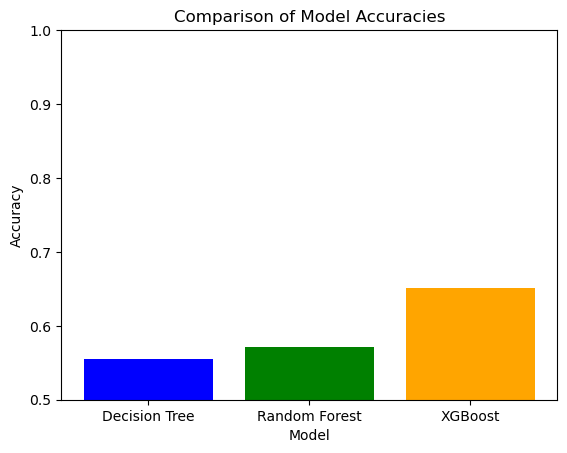

In [48]:
import matplotlib.pyplot as plt

# Visualize model accuracy
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [dt_accuracy, rf_accuracy, xgb_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0.5, 1.0)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()
#as you can see xgboost shows the highest accuracy
